In [1]:
import matplotlib.pyplot as plt
import numpy as np

# radar plot

In [66]:
# 데이터 정의
theta = 'Incomprehensible(1) Disfluent(2) Good(3) Flawless(4)'.split()

v1 = [5, 17, 29, 47]
v2 = [4, 21, 18, 55]
v3 = [2, 9, 25, 62]
v4 = [3, 15, 41, 39]

In [69]:
labels = theta.copy()

num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, len(theta), endpoint=False).tolist()

In [70]:
# 원형 배치를 위해 1번째 값 추가
values = []
for v in (v1, v2, v3, v4):
    tmp = v.copy()
    tmp.append(v[0])
    values.append(tmp)
angles += angles[:1]
labels += [labels[0]]

In [77]:
legends = 'Judge_A Judge_B Judge_C Judge_D'.split()

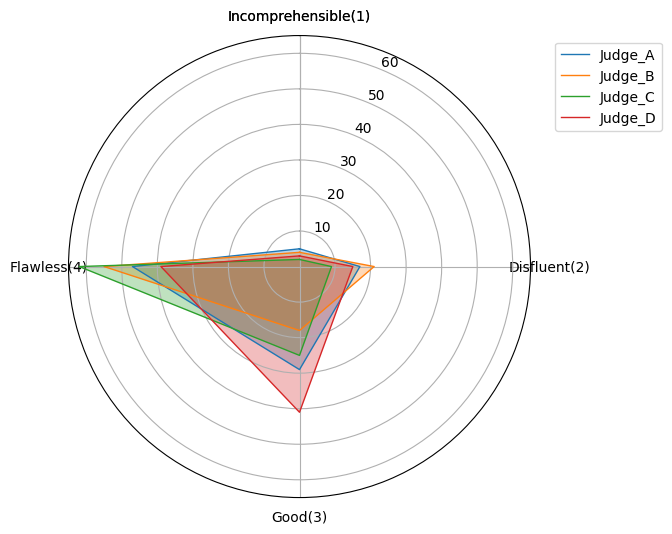

In [105]:
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(polar=True))

for value, legend in zip(values, legends):
    ax.plot(angles, value, linewidth=1, label=legend)
    ax.fill(angles, value, alpha=.3)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.title('GNMT - Fluency (%)', position=(0.1, 1))
plt.savefig('fig4.1.png', dpi=300)
plt.show()

In [123]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=16)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=16)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=16)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=14)  # 범례 폰트 크기
plt.rc('figure', titlesize=14) # figure title 폰트 크기

In [119]:
def radar_plot(labels: list, data: dict, fname: str):
    num_labels = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()

    # 원형 배치를 위해 1번째 값 추가:
    for v in data.values():
        v.append(v[0])
    angles += angles[:1]
    labels += labels[:1]
    
    # display:
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

    for legend, value in data.items():
        ax.plot(angles, value, linewidth=1, label=legend)
        ax.fill(angles, value, alpha=.3)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles), labels)

    #plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.legend()
    #plt.title('GNMT - Fluency (%)', position=(0.1, 1))
    plt.savefig(f'{fname}.png', dpi=300)
    print("saved")
    plt.show()

saved


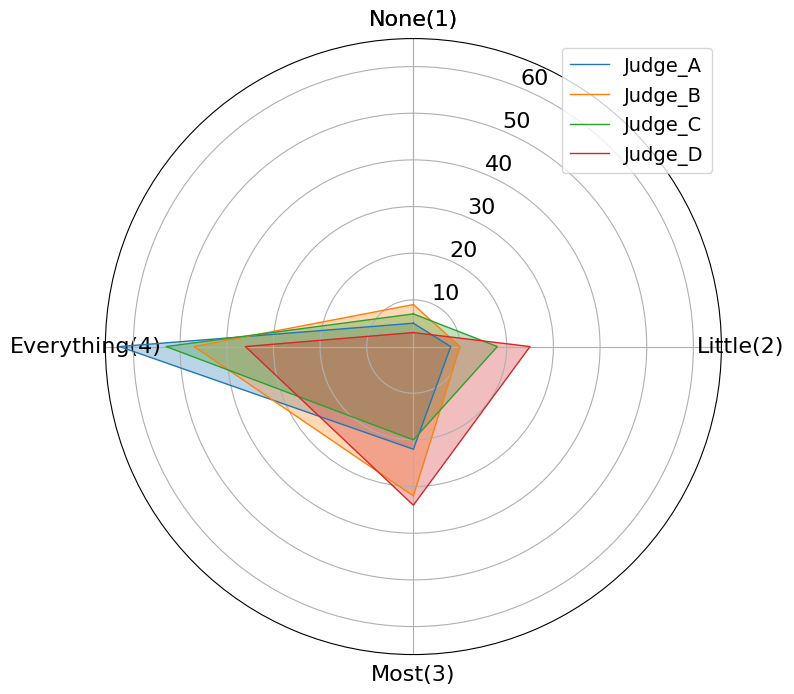

In [125]:
labels = 'None(1) Little(2) Most(3) Everything(4)'.split()
data = {
    'A_judge': [5, 8, 22, 63],
    'B_judge': [9, 10, 32, 47],
    'C_judge': [7, 18, 20, 53],
    'D_judge': [3, 25, 34, 36],
}
fname = '4.2'

radar_plot(labels, data, fname)

saved


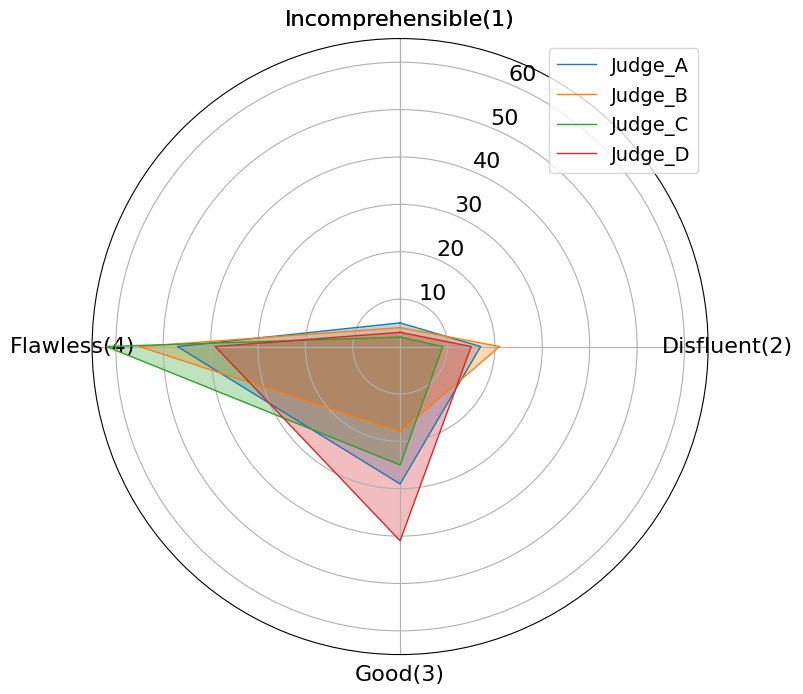

In [126]:
fl_theta = 'Incomprehensible(1) Disfluent(2) Good(3) Flawless(4)'.split()

labels = 'None(1) Little(2) Most(3) Everything(4)'.split()
data = {
    'Judge_A':  [5, 17, 29, 47],
    'Judge_B':  [4, 21, 18, 55],
    'Judge_C': [2, 9, 25, 62],
    'Judge_D': [3, 15, 41, 39],
}
fname = '4.1'
radar_plot(fl_theta, data, fname)

# bar horizontal plot

In [57]:
def display(results, categories):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    cat_colors = plt.colormaps['YlOrRd'](
        np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.set_xlim(0, np.sum(data, axis=1).max())
    
    for i, (colname, color) in enumerate(zip(categories, cat_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                       label=colname, color=color)
        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(categories), bbox_to_anchor=(0, 1),
             loc="lower left", fontsize='large')
    return fig, ax

In [32]:
categories = 'Incomprehensible(1) Disfluent(2) Good(3) Flawless(4)'.split()
results = {
    '$A_{judge}$': [5, 17, 29, 47],
    '$B_{judge}$': [4, 21, 18, 55],
    '$C_{judge}$': [2, 9, 25, 62],
    '$D_{judge}$': [3, 15, 41, 39],
}

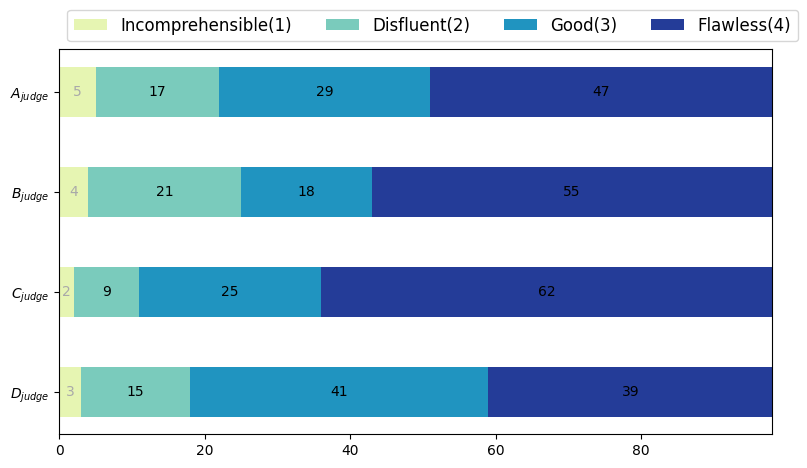

In [33]:
# Fluency
display(results, categories)
#plt.savefig('4.1.png', dpi=300)
plt.show()

In [24]:
categories = 'None(1) Little(2) Most(3) Everything(4)'.split()
results = {
    '$A_{judge}$': [5, 8, 22, 63],
    '$B_{judge}$': [9, 10, 32, 47],
    '$C_{judge}$': [7, 18, 20, 53],
    '$D_{judge}$': [3, 25, 34, 36],
}

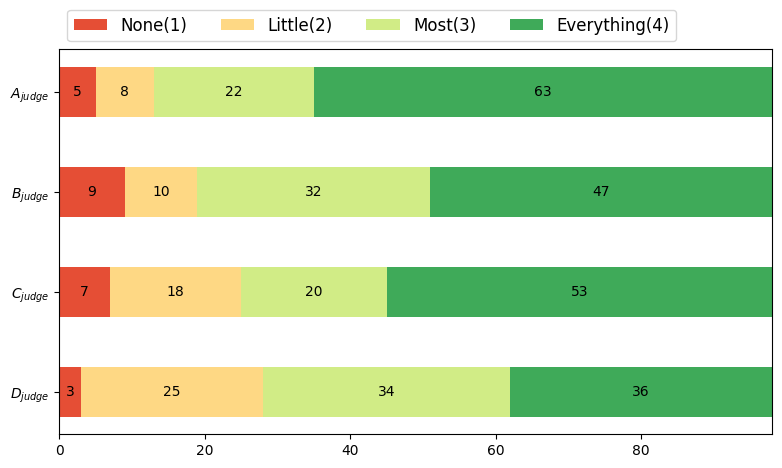

In [25]:
display(results, categories)
plt.savefig('4.2.png', dpi=300)
plt.show()

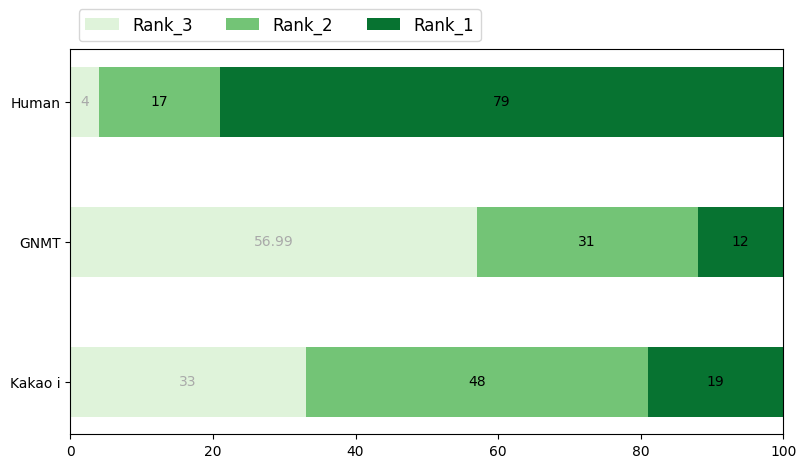

In [49]:
categories = 'Rank_3 Rank_2 Rank_1'.split()
results = {
    'Human': [79, 17, 4][::-1],
    'GNMT': [12, 31, 56.99][::-1],
    'Kakao i': [19, 48, 33][::-1],
}
display(results, categories)
plt.savefig('4.3-1.png', dpi=300)
plt.show()

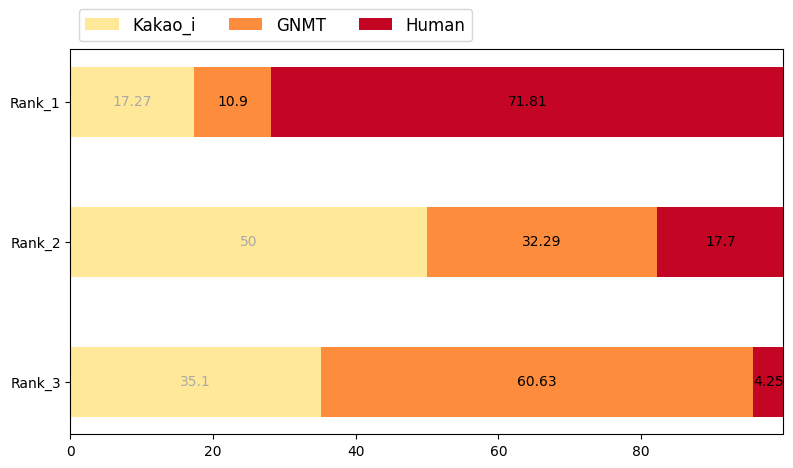

In [60]:
#categories = 'Human GNMT Kakao_i'.split()
categories = 'Kakao_i GNMT Human'.split()
results = {
    'Rank_1': [71.81, 10.9, 17.27][::-1],
    'Rank_2': [17.7, 32.29, 50][::-1],
    'Rank_3': [4.25, 60.63, 35.1][::-1],
}
display(results, categories)
plt.savefig('4.3-2.png', dpi=300)
plt.show()